In [1]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

/home/arush/anaconda3/envs/python39_1/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [3]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)
random_scale = 1000

15 10
l =  0  SNR =  18.18200382560699  m1 =  15  m2 =  10
25 28
l =  1  SNR =  32.7044594330989  m1 =  25  m2 =  28
29 21
l =  1  SNR =  28.4619645982214  m1 =  29  m2 =  21
29 12
l =  1  SNR =  23.08214027924613  m1 =  29  m2 =  12
28 25
l =  1  SNR =  32.01492544864301  m1 =  28  m2 =  25
14 17
l =  1  SNR =  21.654445173143415  m1 =  14  m2 =  17
13 12
l =  1  SNR =  18.785029261443604  m1 =  13  m2 =  12
12 30
l =  2  SNR =  24.886667839263325  m1 =  12  m2 =  30
24 22
l =  2  SNR =  28.259121325088543  m1 =  24  m2 =  22
10 26
l =  2  SNR =  20.623882473324247  m1 =  10  m2 =  26
23 24
l =  2  SNR =  27.730956286779705  m1 =  23  m2 =  24
17 16
l =  2  SNR =  22.538464737486766  m1 =  17  m2 =  16
30 16
l =  2  SNR =  27.379734689709746  m1 =  30  m2 =  16
16 12
l =  2  SNR =  21.54955514030699  m1 =  16  m2 =  12
25 25
l =  2  SNR =  31.109412181138573  m1 =  25  m2 =  25
25 13
l =  2  SNR =  22.022700957744377  m1 =  25  m2 =  13
11 26
l =  2  SNR =  20.212871278478108  m1 =  1

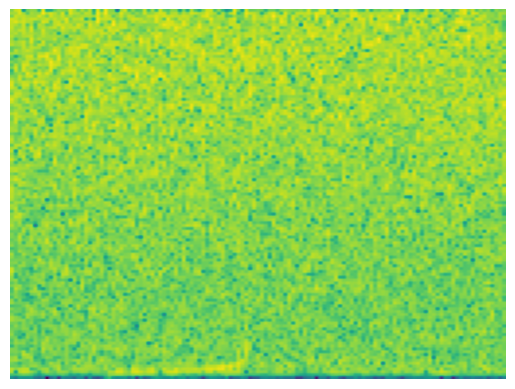

In [4]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 22
l =  100  SNR =  26.5854338111396  m1 =  20  m2 =  22
16 15
l =  100  SNR =  22.644875467718173  m1 =  16  m2 =  15
14 22
l =  100  SNR =  22.220399744394218  m1 =  14  m2 =  22
16 16
l =  100  SNR =  23.184555255489137  m1 =  16  m2 =  16
26 23
l =  100  SNR =  30.458121159384515  m1 =  26  m2 =  23
24 17
l =  100  SNR =  25.663558051857365  m1 =  24  m2 =  17
15 14
l =  100  SNR =  19.75526791413318  m1 =  15  m2 =  14
25 10
l =  101  SNR =  20.392033645627045  m1 =  25  m2 =  10
15 28
l =  101  SNR =  26.11509650382877  m1 =  15  m2 =  28
30 15
l =  101  SNR =  25.89604939927804  m1 =  30  m2 =  15
10 21
l =  101  SNR =  19.773979266716474  m1 =  10  m2 =  21
28 23
l =  102  SNR =  32.42248421104673  m1 =  28  m2 =  23
26 20
l =  102  SNR =  29.265784480450765  m1 =  26  m2 =  20
19 30
l =  102  SNR =  29.335255392275005  m1 =  19  m2 =  30
25 29
l =  102  SNR =  32.11851544477556  m1 =  25  m2 =  29
12 24
l =  102  SNR =  22.989399054316333  m1 =  12  m2 =  24
26 16
l =  102 

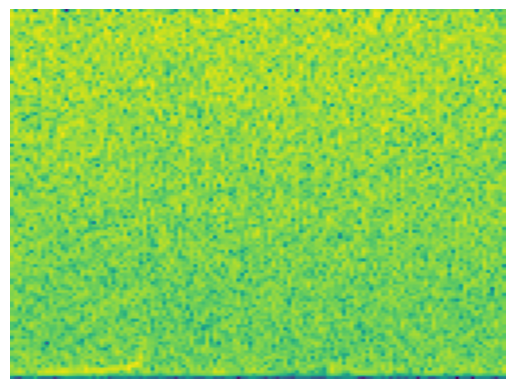

In [5]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

16 12
l =  200  SNR =  18.165828079823577  m1 =  16  m2 =  12
30 14
l =  201  SNR =  24.29004846032367  m1 =  30  m2 =  14
10 18
l =  201  SNR =  17.911282257699916  m1 =  10  m2 =  18
19 27
l =  202  SNR =  26.952900736956412  m1 =  19  m2 =  27
19 25
l =  202  SNR =  27.06673310486758  m1 =  19  m2 =  25
18 30
l =  202  SNR =  28.11381880685764  m1 =  18  m2 =  30
26 11
l =  202  SNR =  23.535253972716326  m1 =  26  m2 =  11
28 23
l =  202  SNR =  31.698565424425297  m1 =  28  m2 =  23
13 30
l =  202  SNR =  24.389232303452545  m1 =  13  m2 =  30
18 12
l =  202  SNR =  19.88471163846344  m1 =  18  m2 =  12
13 11
l =  203  SNR =  16.29952902117413  m1 =  13  m2 =  11
19 13
l =  204  SNR =  21.49015682274457  m1 =  19  m2 =  13
23 14
l =  204  SNR =  22.88863635733416  m1 =  23  m2 =  14
21 12
l =  204  SNR =  21.01194754924867  m1 =  21  m2 =  12
16 11
l =  204  SNR =  20.065018617874546  m1 =  16  m2 =  11
24 23
l =  204  SNR =  30.611702107530387  m1 =  24  m2 =  23
13 23
l =  204  

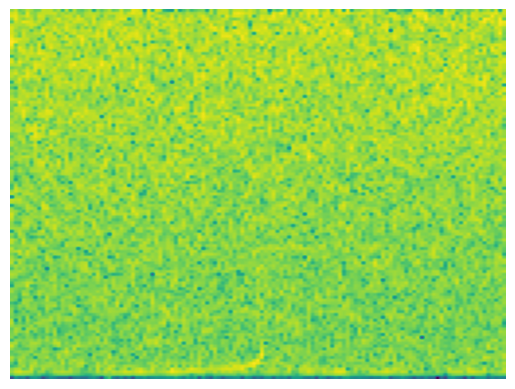

In [6]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

23 10
l =  300  SNR =  20.302886419649507  m1 =  23  m2 =  10
21 18
l =  300  SNR =  24.477784732395023  m1 =  21  m2 =  18
15 15
l =  300  SNR =  21.016705185088544  m1 =  15  m2 =  15
15 19
l =  300  SNR =  22.291175256056885  m1 =  15  m2 =  19
26 24
l =  300  SNR =  32.89438563462922  m1 =  26  m2 =  24
26 13
l =  300  SNR =  23.39890366925208  m1 =  26  m2 =  13
17 24
l =  300  SNR =  26.18743490468784  m1 =  17  m2 =  24
17 10
l =  300  SNR =  18.40246118667525  m1 =  17  m2 =  10
13 23
l =  301  SNR =  23.457098747784325  m1 =  13  m2 =  23
18 14
l =  301  SNR =  23.501219750023473  m1 =  18  m2 =  14
16 20
l =  301  SNR =  23.92570345018147  m1 =  16  m2 =  20
23 14
l =  301  SNR =  24.734078419244728  m1 =  23  m2 =  14
10 25
l =  301  SNR =  19.723875095494574  m1 =  10  m2 =  25
11 17
l =  302  SNR =  19.171398519278807  m1 =  11  m2 =  17
20 24
l =  303  SNR =  27.08056197055323  m1 =  20  m2 =  24
20 20
l =  303  SNR =  25.969075544672624  m1 =  20  m2 =  20
26 23
l =  303

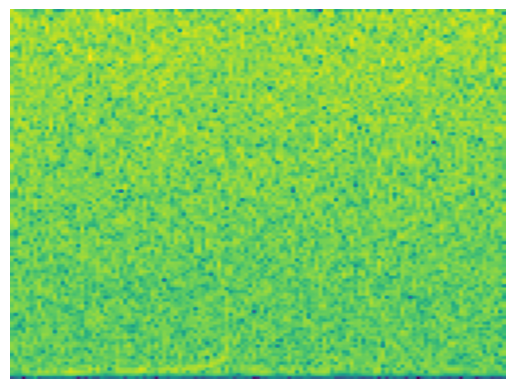

In [7]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

15 28
l =  400  SNR =  26.438981969982652  m1 =  15  m2 =  28
14 14
l =  400  SNR =  19.694846795915957  m1 =  14  m2 =  14
28 16
l =  401  SNR =  25.886027030688034  m1 =  28  m2 =  16
18 20
l =  401  SNR =  24.65737763083079  m1 =  18  m2 =  20
29 15
l =  401  SNR =  25.809728592529012  m1 =  29  m2 =  15
27 27
l =  401  SNR =  32.662226703337886  m1 =  27  m2 =  27
17 17
l =  401  SNR =  25.420161939777994  m1 =  17  m2 =  17
22 14
l =  401  SNR =  22.076795260162758  m1 =  22  m2 =  14
27 22
l =  401  SNR =  30.641102845580935  m1 =  27  m2 =  22
13 17
l =  401  SNR =  19.546447822201664  m1 =  13  m2 =  17
24 23
l =  402  SNR =  28.893789747956912  m1 =  24  m2 =  23
20 29
l =  402  SNR =  29.662004866627488  m1 =  20  m2 =  29
10 14
l =  402  SNR =  19.650691032407206  m1 =  10  m2 =  14
13 25
l =  403  SNR =  23.506781496535528  m1 =  13  m2 =  25
11 19
l =  403  SNR =  18.412792325330063  m1 =  11  m2 =  19
22 16
l =  404  SNR =  23.326569156263886  m1 =  22  m2 =  16
21 23
l =

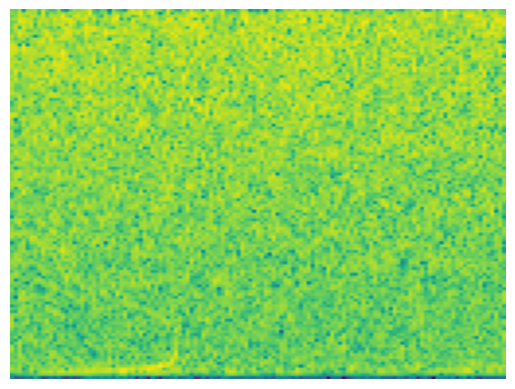

In [8]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [9]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

28 29
l =  500  SNR =  33.93417098187304  m1 =  28  m2 =  29
30 19
l =  500  SNR =  27.499813542820537  m1 =  30  m2 =  19
10 11
l =  500  SNR =  16.248625172159674  m1 =  10  m2 =  11
28 28
l =  501  SNR =  33.79508384205671  m1 =  28  m2 =  28
28 11
l =  501  SNR =  23.51528600893416  m1 =  28  m2 =  11
21 11
l =  501  SNR =  21.864773236699133  m1 =  21  m2 =  11
10 11
l =  501  SNR =  17.161780925854014  m1 =  10  m2 =  11
26 24
l =  502  SNR =  32.150235392894416  m1 =  26  m2 =  24
22 12
l =  502  SNR =  20.917627189337512  m1 =  22  m2 =  12
29 26
l =  502  SNR =  32.52676773962999  m1 =  29  m2 =  26
22 28
l =  502  SNR =  28.449102073266626  m1 =  22  m2 =  28
16 18
l =  502  SNR =  23.811952325415078  m1 =  16  m2 =  18
12 13
l =  502  SNR =  18.52159918238733  m1 =  12  m2 =  13
11 14
l =  503  SNR =  19.082426396396052  m1 =  11  m2 =  14
15 28
l =  504  SNR =  24.796314257852686  m1 =  15  m2 =  28
21 16
l =  504  SNR =  23.78826992767873  m1 =  21  m2 =  16
19 16
l =  504

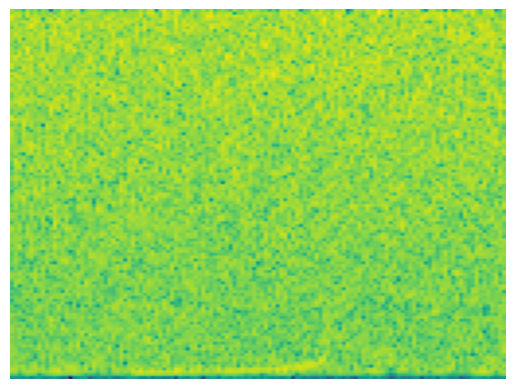

In [10]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

23 10
l =  600  SNR =  20.15847133113505  m1 =  23  m2 =  10
17 18
l =  600  SNR =  22.572093233533806  m1 =  17  m2 =  18
26 18
l =  600  SNR =  27.589288195342366  m1 =  26  m2 =  18
30 24
l =  600  SNR =  31.245066592841056  m1 =  30  m2 =  24
23 18
l =  600  SNR =  27.034785609117634  m1 =  23  m2 =  18
16 29
l =  600  SNR =  26.724728467231312  m1 =  16  m2 =  29
17 22
l =  600  SNR =  22.465898688824776  m1 =  17  m2 =  22
29 29
l =  600  SNR =  34.90186090147429  m1 =  29  m2 =  29
16 21
l =  600  SNR =  23.932385470556625  m1 =  16  m2 =  21
14 13
l =  600  SNR =  17.87743443920578  m1 =  14  m2 =  13
30 20
l =  601  SNR =  27.918632270783394  m1 =  30  m2 =  20
20 15
l =  601  SNR =  23.81502558515808  m1 =  20  m2 =  15
14 25
l =  601  SNR =  23.647644013469467  m1 =  14  m2 =  25
25 26
l =  601  SNR =  30.845212886982186  m1 =  25  m2 =  26
20 25
l =  601  SNR =  26.43811599046263  m1 =  20  m2 =  25
30 19
l =  601  SNR =  27.99510826442134  m1 =  30  m2 =  19
15 21
l =  601

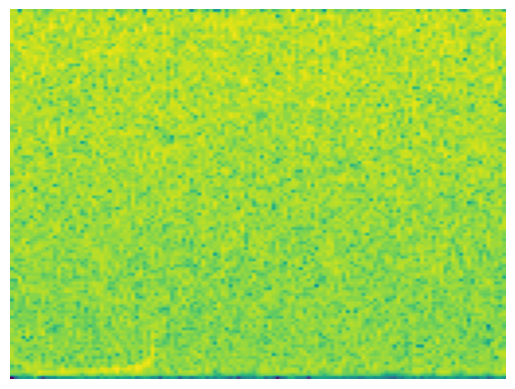

In [11]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

15 12
l =  700  SNR =  21.051791790400355  m1 =  15  m2 =  12
20 28
l =  700  SNR =  29.1410502257657  m1 =  20  m2 =  28
20 15
l =  700  SNR =  23.51019545054165  m1 =  20  m2 =  15
10 22
l =  700  SNR =  19.083256031879646  m1 =  10  m2 =  22
29 20
l =  701  SNR =  30.550376822592625  m1 =  29  m2 =  20
30 17
l =  701  SNR =  25.843418736644104  m1 =  30  m2 =  17
20 24
l =  701  SNR =  28.89415855180521  m1 =  20  m2 =  24
21 13
l =  701  SNR =  21.708509176754756  m1 =  21  m2 =  13
21 10
l =  701  SNR =  20.99911875477103  m1 =  21  m2 =  10
29 22
l =  701  SNR =  31.49823242208838  m1 =  29  m2 =  22
25 11
l =  701  SNR =  20.27328133410734  m1 =  25  m2 =  11
11 24
l =  701  SNR =  22.137851733023552  m1 =  11  m2 =  24
16 13
l =  701  SNR =  20.7103691382459  m1 =  16  m2 =  13
15 23
l =  701  SNR =  25.0398602541531  m1 =  15  m2 =  23
26 25
l =  701  SNR =  31.660465739240937  m1 =  26  m2 =  25
24 26
l =  701  SNR =  30.40807788525711  m1 =  24  m2 =  26
24 11
l =  701  SNR 

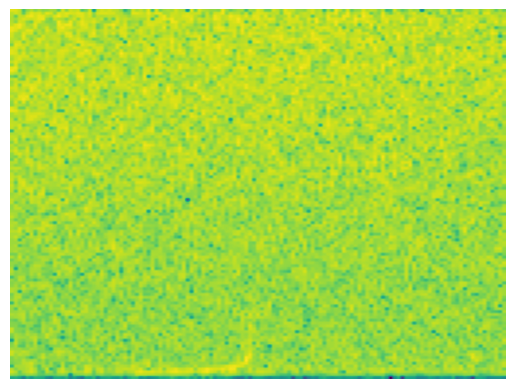

In [12]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

14 20
l =  800  SNR =  21.434754231160227  m1 =  14  m2 =  20
11 14
l =  800  SNR =  17.54478101766672  m1 =  11  m2 =  14
27 27
l =  801  SNR =  32.37282816482199  m1 =  27  m2 =  27
25 15
l =  801  SNR =  26.335646480697356  m1 =  25  m2 =  15
30 15
l =  801  SNR =  26.36112080643146  m1 =  30  m2 =  15
11 23
l =  801  SNR =  20.524522898012  m1 =  11  m2 =  23
15 23
l =  801  SNR =  23.716328741418717  m1 =  15  m2 =  23
14 12
l =  801  SNR =  18.00978249405635  m1 =  14  m2 =  12
12 22
l =  802  SNR =  20.604184268651757  m1 =  12  m2 =  22
24 26
l =  802  SNR =  31.74723347441211  m1 =  24  m2 =  26
19 23
l =  802  SNR =  26.388425509877298  m1 =  19  m2 =  23
24 21
l =  802  SNR =  29.383197457241984  m1 =  24  m2 =  21
15 26
l =  802  SNR =  23.44684645610532  m1 =  15  m2 =  26
10 19
l =  802  SNR =  20.45229567879419  m1 =  10  m2 =  19
25 29
l =  802  SNR =  32.06041371651875  m1 =  25  m2 =  29
17 19
l =  802  SNR =  23.336529512216455  m1 =  17  m2 =  19
20 16
l =  802  SNR

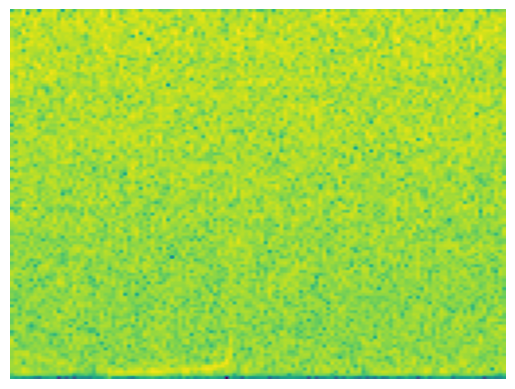

In [13]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 24
l =  900  SNR =  27.270184360540576  m1 =  20  m2 =  24
22 17
l =  900  SNR =  24.005784907262562  m1 =  22  m2 =  17
11 20
l =  900  SNR =  20.552774632167516  m1 =  11  m2 =  20
24 28
l =  900  SNR =  30.50843688256632  m1 =  24  m2 =  28
15 23
l =  900  SNR =  24.633107000080923  m1 =  15  m2 =  23
12 13
l =  900  SNR =  19.664623377401057  m1 =  12  m2 =  13
29 10
l =  901  SNR =  19.80984961328178  m1 =  29  m2 =  10
14 12
l =  902  SNR =  17.958203294057963  m1 =  14  m2 =  12
18 23
l =  903  SNR =  24.1039058352692  m1 =  18  m2 =  23
23 25
l =  903  SNR =  30.351178515201603  m1 =  23  m2 =  25
20 14
l =  903  SNR =  20.155735550205076  m1 =  20  m2 =  14
24 11
l =  903  SNR =  20.111674451363356  m1 =  24  m2 =  11
27 19
l =  903  SNR =  29.043872763274297  m1 =  27  m2 =  19
17 10
l =  903  SNR =  19.55668776277791  m1 =  17  m2 =  10
22 24
l =  904  SNR =  29.781277439856876  m1 =  22  m2 =  24
20 17
l =  904  SNR =  24.13734868162036  m1 =  20  m2 =  17
13 28
l =  904

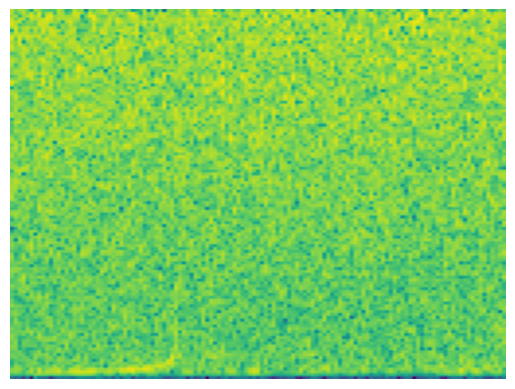

In [14]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

30 21
l =  1000  SNR =  31.361208445965215  m1 =  30  m2 =  21
10 25
l =  1000  SNR =  20.314032311341577  m1 =  10  m2 =  25
13 23
l =  1000  SNR =  24.189658684682016  m1 =  13  m2 =  23
18 29
l =  1000  SNR =  28.068308151673673  m1 =  18  m2 =  29
30 23
l =  1000  SNR =  31.70138092401793  m1 =  30  m2 =  23
19 22
l =  1000  SNR =  26.110945470619008  m1 =  19  m2 =  22
15 14
l =  1000  SNR =  20.208437351134585  m1 =  15  m2 =  14
14 20
l =  1000  SNR =  24.27634977139198  m1 =  14  m2 =  20
25 10
l =  1000  SNR =  20.130527742694074  m1 =  25  m2 =  10
18 29
l =  1000  SNR =  28.068308151673673  m1 =  18  m2 =  29
22 18
l =  1000  SNR =  24.37704456403496  m1 =  22  m2 =  18
30 27
l =  1000  SNR =  32.55770166093846  m1 =  30  m2 =  27
14 29
l =  1000  SNR =  25.219671279756035  m1 =  14  m2 =  29
21 29
l =  1000  SNR =  30.798717008248342  m1 =  21  m2 =  29
18 23
l =  1000  SNR =  27.0649593402176  m1 =  18  m2 =  23
11 20
l =  1000  SNR =  18.474978101819545  m1 =  11  m2 =  2

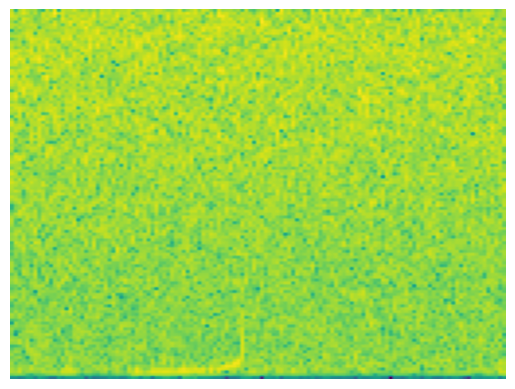

In [15]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

15 13
l =  1100  SNR =  20.932850914604842  m1 =  15  m2 =  13
22 12
l =  1100  SNR =  21.79347343050015  m1 =  22  m2 =  12
14 29
l =  1100  SNR =  23.971899126656695  m1 =  14  m2 =  29
25 26
l =  1100  SNR =  29.232609751513742  m1 =  25  m2 =  26
29 16
l =  1100  SNR =  25.24196848043904  m1 =  29  m2 =  16
21 16
l =  1100  SNR =  24.596877179667512  m1 =  21  m2 =  16
15 30
l =  1100  SNR =  25.981052352639296  m1 =  15  m2 =  30
17 30
l =  1100  SNR =  27.002158118160796  m1 =  17  m2 =  30
20 20
l =  1100  SNR =  25.825335739806395  m1 =  20  m2 =  20
11 26
l =  1100  SNR =  20.88522151742554  m1 =  11  m2 =  26
13 21
l =  1100  SNR =  21.451699363847325  m1 =  13  m2 =  21
19 15
l =  1100  SNR =  23.427408761758613  m1 =  19  m2 =  15
14 28
l =  1100  SNR =  23.26823434254907  m1 =  14  m2 =  28
12 24
l =  1100  SNR =  20.884341832529227  m1 =  12  m2 =  24
29 12
l =  1100  SNR =  21.93334122566309  m1 =  29  m2 =  12
25 12
l =  1100  SNR =  22.784616350226813  m1 =  25  m2 =  

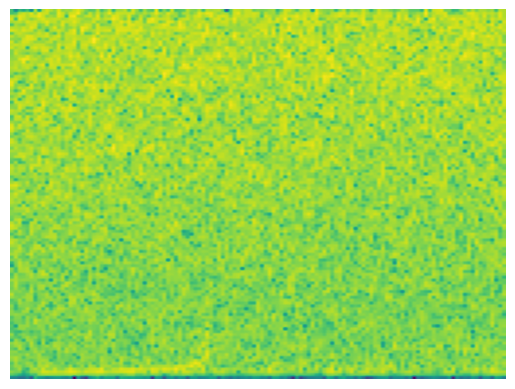

In [16]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 14
l =  1200  SNR =  21.575169649004504  m1 =  20  m2 =  14
27 20
l =  1200  SNR =  27.249808114137803  m1 =  27  m2 =  20
14 27
l =  1200  SNR =  25.7241171202761  m1 =  14  m2 =  27
30 21
l =  1200  SNR =  30.23105121262881  m1 =  30  m2 =  21
16 16
l =  1200  SNR =  22.87113022146071  m1 =  16  m2 =  16
12 28
l =  1200  SNR =  22.979223183635032  m1 =  12  m2 =  28
27 13
l =  1200  SNR =  24.563517871188434  m1 =  27  m2 =  13
28 14
l =  1200  SNR =  25.98241676139897  m1 =  28  m2 =  14
13 19
l =  1200  SNR =  20.61713318950297  m1 =  13  m2 =  19
27 10
l =  1200  SNR =  19.085310476873627  m1 =  27  m2 =  10
29 19
l =  1201  SNR =  29.245263910562183  m1 =  29  m2 =  19
18 10
l =  1201  SNR =  17.809708288261934  m1 =  18  m2 =  10
10 15
l =  1202  SNR =  18.787598956648935  m1 =  10  m2 =  15
19 17
l =  1203  SNR =  24.31836759375375  m1 =  19  m2 =  17
17 27
l =  1203  SNR =  28.111969957298964  m1 =  17  m2 =  27
10 16
l =  1203  SNR =  18.273643825953314  m1 =  10  m2 =  16

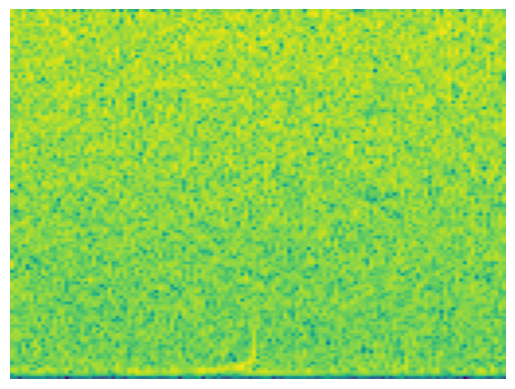

In [17]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 16
l =  1300  SNR =  17.891610985371003  m1 =  10  m2 =  16
26 24
l =  1301  SNR =  30.536932004218485  m1 =  26  m2 =  24
20 23
l =  1301  SNR =  27.16323210360028  m1 =  20  m2 =  23
19 15
l =  1301  SNR =  23.564327304767282  m1 =  19  m2 =  15
16 18
l =  1301  SNR =  23.835053230062098  m1 =  16  m2 =  18
13 16
l =  1301  SNR =  20.899192566961894  m1 =  13  m2 =  16
16 16
l =  1301  SNR =  21.103882808042822  m1 =  16  m2 =  16
28 20
l =  1301  SNR =  30.279549614057515  m1 =  28  m2 =  20
20 16
l =  1301  SNR =  22.415515014484104  m1 =  20  m2 =  16
15 28
l =  1301  SNR =  25.746679231023922  m1 =  15  m2 =  28
15 25
l =  1301  SNR =  24.487353735259816  m1 =  15  m2 =  25
17 13
l =  1301  SNR =  21.331883364793775  m1 =  17  m2 =  13
28 22
l =  1301  SNR =  29.500528121668218  m1 =  28  m2 =  22
11 30
l =  1301  SNR =  21.05866175366987  m1 =  11  m2 =  30
21 26
l =  1301  SNR =  28.893620291702945  m1 =  21  m2 =  26
16 16
l =  1301  SNR =  20.141896213381294  m1 =  16  m2 

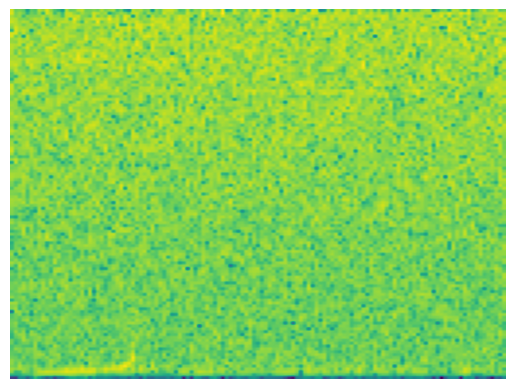

In [18]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 11
l =  1400  SNR =  18.844542619506385  m1 =  19  m2 =  11
20 25
l =  1401  SNR =  28.480523155660872  m1 =  20  m2 =  25
13 25
l =  1401  SNR =  22.961567535859132  m1 =  13  m2 =  25
29 16
l =  1401  SNR =  26.391126854925737  m1 =  29  m2 =  16
12 13
l =  1401  SNR =  19.81293919458595  m1 =  12  m2 =  13
14 13
l =  1402  SNR =  19.73117933410912  m1 =  14  m2 =  13
15 20
l =  1403  SNR =  23.856409981888973  m1 =  15  m2 =  20
16 20
l =  1403  SNR =  24.145607591667158  m1 =  16  m2 =  20
28 24
l =  1403  SNR =  31.615759319389042  m1 =  28  m2 =  24
22 24
l =  1403  SNR =  29.367988973053194  m1 =  22  m2 =  24
28 14
l =  1403  SNR =  25.617643570425933  m1 =  28  m2 =  14
17 30
l =  1403  SNR =  27.890530215490962  m1 =  17  m2 =  30
24 26
l =  1403  SNR =  30.31007247105774  m1 =  24  m2 =  26
30 25
l =  1403  SNR =  35.288166798374284  m1 =  30  m2 =  25
16 25
l =  1403  SNR =  25.64972894909746  m1 =  16  m2 =  25
15 11
l =  1403  SNR =  17.35542116800364  m1 =  15  m2 =  

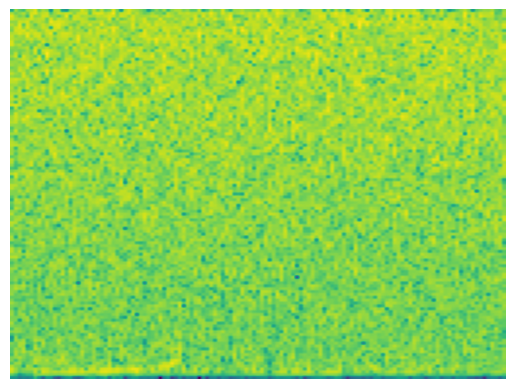

In [19]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 27000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+27000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
